# Introduction

This is an Exploratory Data Analysis of a dataset (https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset) containing player characteristics and statistics in the Fifa 18 video game.

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

from itertools import product
import itertools
from collections import OrderedDict
import operator
import re
from math import sqrt
import pickle

# Data Preprocessing

In [2]:
original_df = pd.read_csv('CompleteDataset.csv', error_bad_lines=False, low_memory=False)

## Metadata

In [3]:
processed_df = original_df.copy()
processed_df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

# Data Preprocessing

Here we will take part in data cleaning: finding missing values, converting to desired data types, removing unwanted data etc.

In [5]:
# Drop the colums that cannot be used
processed_df = processed_df.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'ID'], 1)

In [6]:
# Convert the numerical values from string type to integer type. 
def str_to_int(string):
    try:
        integer = float(string)
        return integer
    except ValueError:
        return np.nan
    
processed_df['Acceleration'] = processed_df['Acceleration'].apply(str_to_int)
processed_df['Aggression'] = processed_df['Aggression'].apply(str_to_int)
processed_df['Agility'] = processed_df['Agility'].apply(str_to_int)
processed_df['Balance'] = processed_df['Balance'].apply(str_to_int)
processed_df['Ball control'] = processed_df['Ball control'].apply(str_to_int)
processed_df['Composure'] = processed_df['Composure'].apply(str_to_int)
processed_df['Crossing'] = processed_df['Crossing'].apply(str_to_int)
processed_df['Curve'] = processed_df['Curve'].apply(str_to_int)
processed_df['Dribbling'] = processed_df['Dribbling'].apply(str_to_int)
processed_df['Finishing'] = processed_df['Finishing'].apply(str_to_int)
processed_df['Free kick accuracy'] = processed_df['Free kick accuracy'].apply(str_to_int)
processed_df['GK diving'] = processed_df['GK diving'].apply(str_to_int)
processed_df['GK handling'] = processed_df['GK handling'].apply(str_to_int)
processed_df['GK kicking'] = processed_df['GK kicking'].apply(str_to_int)
processed_df['GK positioning'] = processed_df['GK positioning'].apply(str_to_int)
processed_df['GK reflexes'] = processed_df['GK reflexes'].apply(str_to_int)
processed_df['Heading accuracy'] = processed_df['Heading accuracy'].apply(str_to_int)
processed_df['Interceptions'] = processed_df['Interceptions'].apply(str_to_int)
processed_df['Jumping'] = processed_df['Jumping'].apply(str_to_int)
processed_df['Long passing'] = processed_df['Long passing'].apply(str_to_int)
processed_df['Long shots'] = processed_df['Long shots'].apply(str_to_int)
processed_df['Marking'] = processed_df['Marking'].apply(str_to_int)
processed_df['Penalties'] = processed_df['Penalties'].apply(str_to_int)
processed_df['Positioning'] = processed_df['Positioning'].apply(str_to_int)
processed_df['Reactions'] = processed_df['Reactions'].apply(str_to_int)
processed_df['Short passing'] = processed_df['Short passing'].apply(str_to_int)
processed_df['Shot power'] = processed_df['Shot power'].apply(str_to_int)
processed_df['Sliding tackle'] = processed_df['Sliding tackle'].apply(str_to_int)
processed_df['Sprint speed'] = processed_df['Sprint speed'].apply(str_to_int)
processed_df['Stamina'] = processed_df['Stamina'].apply(str_to_int)
processed_df['Standing tackle'] = processed_df['Standing tackle'].apply(str_to_int)
processed_df['Strength'] = processed_df['Strength'].apply(str_to_int)
processed_df['Vision'] = processed_df['Vision'].apply(str_to_int)
processed_df['Volleys'] = processed_df['Volleys'].apply(str_to_int)
processed_df['CAM'] = processed_df['CAM'].apply(str_to_int)
processed_df['CB'] = processed_df['CB'].apply(str_to_int)
processed_df['CDM'] = processed_df['CDM'].apply(str_to_int)
processed_df['CF'] = processed_df['CF'].apply(str_to_int)
processed_df['CM'] = processed_df['CM'].apply(str_to_int)
processed_df['LAM'] = processed_df['LAM'].apply(str_to_int)
processed_df['LB'] = processed_df['LB'].apply(str_to_int)
processed_df['LCM'] = processed_df['LCM'].apply(str_to_int)
processed_df['LDM'] = processed_df['LDM'].apply(str_to_int)
processed_df['LF'] = processed_df['LF'].apply(str_to_int)
processed_df['LM'] = processed_df['LM'].apply(str_to_int)
processed_df['LS'] = processed_df['LS'].apply(str_to_int)
processed_df['LW'] = processed_df['LW'].apply(str_to_int)
processed_df['LWB'] = processed_df['LWB'].apply(str_to_int)
processed_df['RAM'] = processed_df['RAM'].apply(str_to_int)
processed_df['RB'] = processed_df['RB'].apply(str_to_int)
processed_df['RCB'] = processed_df['RCB'].apply(str_to_int)
processed_df['RCM'] = processed_df['RCM'].apply(str_to_int)
processed_df['RDM'] = processed_df['RDM'].apply(str_to_int)
processed_df['RF'] = processed_df['RF'].apply(str_to_int)
processed_df['RM'] = processed_df['RM'].apply(str_to_int)
processed_df['RS'] = processed_df['RS'].apply(str_to_int)
processed_df['RW'] = processed_df['RW'].apply(str_to_int)
processed_df['RWB'] = processed_df['RWB'].apply(str_to_int)
processed_df['ST'] = processed_df['ST'].apply(str_to_int)

In [7]:
#Convert wages and values to floats
def str_to_float(string):
    if string[-1] == 'M':
        value = float(string[1:-1])*1000000
    elif string[-1] == 'K':
        value = float(string[1:-1])*1000
    else:
        value = float(string[1:])
    return value
        
processed_df['Value'] = processed_df['Value'].apply(str_to_float)
processed_df['Wage'] = processed_df['Wage'].apply(str_to_float)

# Exploratory Data Analysis

### Player Origins
Out of curiosity let's look at where most of the players come from.

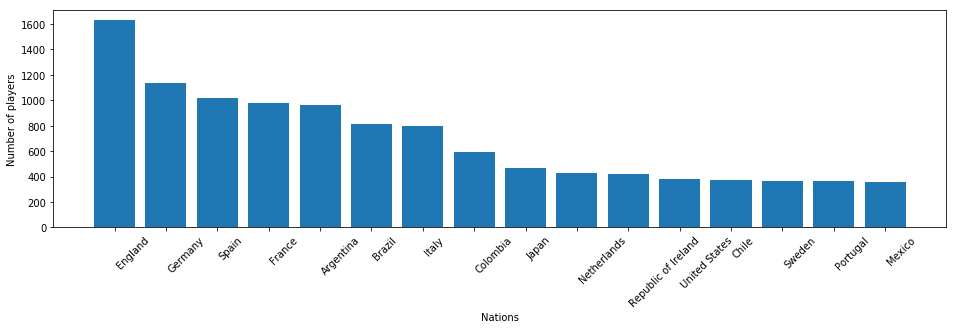

In [8]:
#Number of player per country
nations = {'Nation': 0}
def count_nations(nation):
    #Count the players per country
    if (nation in nations):
        nations[nation] = nations[nation] + 1
    else:
        nations[nation] = 1

processed_df['Nationality'].apply(count_nations)
nations.pop('Nation', None)
#Sort and take the top 10%
sorted_nations = OrderedDict(sorted(nations.items(), key=lambda x: x[1], reverse=True))
sorted_nations = dict((k, sorted_nations[k]) for k in list(sorted_nations.keys())[0:int(len(sorted_nations)/10)])

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_nations)), list(sorted_nations.values()))
plt.xticks(range(len(sorted_nations)), list(sorted_nations.keys()), rotation=45,  ha='left')
plt.xlabel('Nations')
plt.ylabel('Number of players')
plt.show()


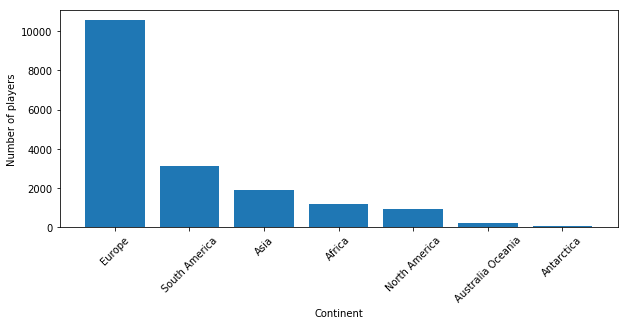

In [9]:
#Number of player per continent
continent_list = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}
continents = {'Africa' : 0, 'Antarctica' : 0,'Asia' : 0, 'Australia Oceania' : 0, 'Europe' : 0, 'North America' : 0, 'South America' : 0}

def count_continent(nation):
    #Count the players per continent
    for continent in continent_list:
        if nation in continent_list[continent]:
            continents[continent] = continents[continent] + 1
            return continent
    return np.NaN

processed_df['Nationality'].apply(count_continent)
sorted_continents = OrderedDict(sorted(continents.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_continents)), list(sorted_continents.values()))
plt.xticks(range(len(sorted_continents)), list(sorted_continents.keys()), rotation = 45)
plt.xlabel('Continent')
plt.ylabel('Number of players')
plt.show()

In the five biggest professional football leagues let's look at the proportion of foreign player.

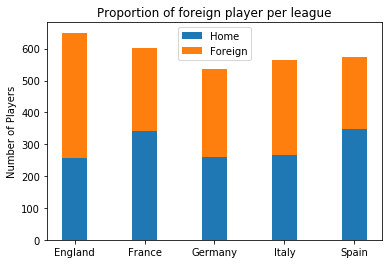

In [10]:
club_list_per_league = {
    'England' : ['Manchester United', 'Chelsea', 'Manchester City', 'Arsenal', 'Tottenham Hotspur', 'Liverpool', 'Leicester City', 'Southampton', 'Everton', 'Swansea City', 'Stoke City', 'West Ham United', 'Watford', 'Bournemouth', 'Crystal Palace', 'West Bromwich Albion', 'Burnley', 'Newcastle United', 'Brighton & Hove Albion', 'Huddersfield Town'],
    'France' : ['Paris Saint-Germain', 'AS Monaco', 'AS Saint-Étienne', 'Olympique de Marseille', 'Olympique Lyonnais', 'OGC Nice', 'Girondins de Bordeaux', 'Stade Rennais FC', 'Montpellier Hérault SC', 'FC Nantes', 'En Avant de Guingamp', 'Amiens SC Football', 'Dijon FCO', 'Angers SCO', 'LOSC Lille', 'RC Strasbourg', 'SM Caen', 'Toulouse FC', 'ES Troyes AC', 'FC Metz'],
    'Germany' : ['FC Bayern Munich', 'Borussia Dortmund', 'Bayer 04 Leverkusen', 'FC Schalke 04', 'RB Leipzig', 'Borussia Mönchengladbach', 'TSG 1899 Hoffenheim', 'SV Werder Bremen', 'VfL Wolfsburg', 'Hertha BSC Berlin', 'Eintracht Frankfurt', 'VfB Stuttgart', 'Eintracht Braunschweig', 'FC Augsburg', '1. FSV Mainz 05', 'Hamburger SV', 'Hannover 96', 'SC Freiburg'],
    'Italy' : ['Juventus', 'Milan', 'Napoli', 'Inter', 'Roma', 'Torino', 'Lazio', 'Genoa', 'Sassuolo', 'Sampdoria', 'Fiorentina', 'Atalanta', 'Sampdoria', 'Bologna', 'Chievo Verona', 'Udinese', 'Cagliari', 'Ferrara (SPAL)', 'Crotone', 'Hellas Verona', 'Benevento Calcio'],
    'Spain' : ['Real Madrid CF', 'FC Barcelona', 'Atletico Madrid', 'Athletic Club de Bilbao','1. FC Köln', 'Villarreal CF', 'Real Sociedad', 'UD Las Palmas', 'RC Celta de Vigo', 'RCD Espanyol', 'SD Eibar', 'Valencia CF', 'Sevilla FC', 'RC Deportivo de La Coruña', 'Real Betis Balompié', 'Getafe CF', 'Girona CF', 'Deportivo Alav√©s', 'Levante UD', 'Deportivo Alavés', 'Málaga CF'],
}

two_columns = processed_df[['Nationality', 'Club']]

nationality_proportion = {'England' : [0, 0], 'France' : [0, 0], 'Germany' : [0, 0], 'Italy' : [0, 0], 'Spain' : [0, 0]}
def count_foreign_players():
    index = 0
    while (index < len(two_columns)):
        for country in club_list_per_league:
            if two_columns['Club'][index] in club_list_per_league[country]:
                if two_columns['Nationality'][index] == country:
                    nationality_proportion[country][0] = nationality_proportion[country][0] + 1
                else:
                    nationality_proportion[country][1] = nationality_proportion[country][1] + 1
        index += 1

count_foreign_players()
N = 5
home = (nationality_proportion['England'][0], nationality_proportion['France'][0], nationality_proportion['Germany'][0], nationality_proportion['Italy'][0], nationality_proportion['Spain'][0])
foreign = (nationality_proportion['England'][1], nationality_proportion['France'][1], nationality_proportion['Germany'][1], nationality_proportion['Italy'][1], nationality_proportion['Spain'][1])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
p1 = ax.bar(ind, home, width)
p2 = ax.bar(ind, foreign, width, bottom = home)
plt.ylabel('Number of Players')
plt.title('Proportion of foreign player per league')
plt.xticks(ind, ('England', 'France', 'Germany', 'Italy', 'Spain'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Home', 'Foreign'))
plt.show()

Interestingly even though Europe has the most players, their notorious leagues have many international players.

### Player Values

Let us take a look at player transfer value and salary based on his characteristics.

In [11]:
# Maximum player value per country
# Selecting players with age smaller then 40 
dataset = processed_df.loc[processed_df['Age'] <= 40]
country_value = dataset.groupby("Nationality")["Value"].max()
country_value = country_value.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_value['Nationality'],
        z = country_value['Value'],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Maximum<br>Player Value'),
      ) ]

layout = dict(
    title = 'Maximum Player Value Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False )

In [12]:
#Maximim player wage per country
country_wage = dataset.groupby("Nationality")["Wage"].max()
country_wage = country_wage.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_wage['Nationality'],
        z = country_wage['Wage'],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Maximum<br>Player Value'),
      ) ]

layout = dict(
    title = 'Maximum Player Wage Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False )

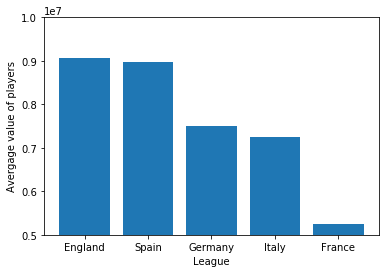

In [13]:
#Player value per league 
value_per_league = {'League': 0}
league_value = {'England' : 0, 'France' : 0, 'Germany' : 0, 'Italy' : 0, 'Spain' : 0}

def sum_values(series):
    value = series[1]

    #Count the players value per league
    for league in club_list_per_league:
        if series[0] in club_list_per_league[league]:
            league_value[league] += value
            return league
    return np.NaN

club_value = processed_df[['Club', 'Value']]
club_value.apply(sum_values, 1)
value_per_league.pop('League', None)

#Average the players value per league
for league in league_value:
    league_value[league] = league_value[league] / (float(nationality_proportion[league][0])+float(nationality_proportion[league][1]))

sorted_league_value = OrderedDict(sorted(league_value.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_league_value)), list(sorted_league_value.values()))
plt.xticks(range(len(sorted_league_value)), list(sorted_league_value.keys()))
plt.xlabel('League')
plt.ylabel('Avergage value of players')
ax.set(ylim=(0.5e7, 1e7))
plt.show()

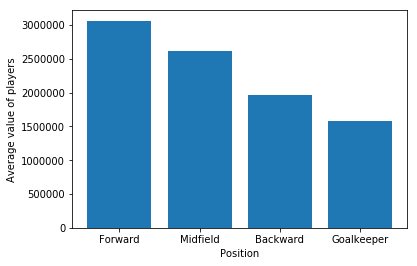

In [14]:
#Player value per position
position_list = {
    'Forward' : ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'],
    'Midfield' : ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCB', 'RCM', 'RDM', 'RM'],
    'Backward' : ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'],
    'Goalkeeper' : ['GK'],
}
sum_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
player_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
average_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}

def sum_values(series):
    already_counted = [0, 0, 0, 0] #Array to avoid having repeated values in the average
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    value = series[1]

    #Count the players per position category
    index = 0
    for preferred_position in preferred_position_list:
        for position in position_list:
            if preferred_position in position_list[position]:
                if(not already_counted[index]):
                    sum_per_position[position] += value
                    player_per_position[position] += 1                    
                    already_counted[index] = 1
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position category
for position in sum_per_position:
    average_per_position[position] = sum_per_position[position] / player_per_position[position]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average_per_position)), list(average_per_position.values()))
plt.xticks(range(len(average_per_position)), list(average_per_position.keys()))
plt.xlabel('Position')
plt.ylabel('Average value of players')
plt.show()

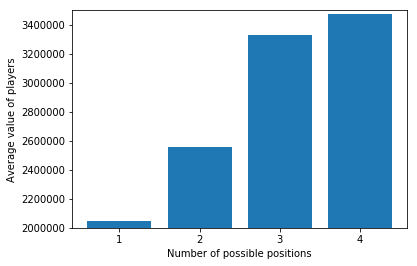

In [15]:
#Versatility and value
skill_versatility = {1: [0, 0], 2: [0, 0], 3: [0, 0], 4: [0, 0]}
average = {1: 0, 2: 0, 3: 0, 4: 0}

def sum_values(series):
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    skill_count = len(preferred_position_list)
    value = series[1]

    #Count the players per versatility
    if (skill_count in skill_versatility):
        skill_versatility[skill_count][0] += 1
        skill_versatility[skill_count][1] += value  
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position count
for count in skill_versatility:
    average[count] = skill_versatility[count][1] / skill_versatility[count][0]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average)), list(average.values()))
plt.xticks(range(len(average)), list(average.keys()))
plt.xlabel('Number of possible positions')
plt.ylabel('Average value of players')
ax.set(ylim=(2000000, 3500000))
plt.show()

<Figure size 432x288 with 0 Axes>

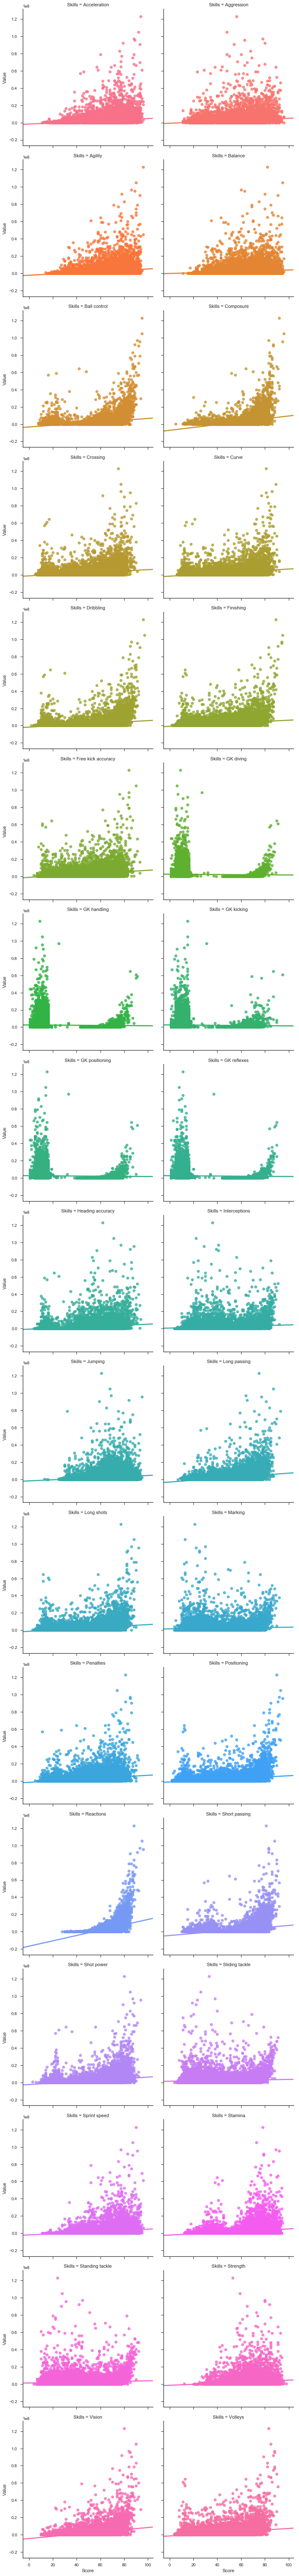

In [16]:
#Player value per skill
fig = plt.figure(figsize=(6,4))
sns.set(style="ticks")
test = pd.DataFrame(np.c_[processed_df['Value'], processed_df['Acceleration'], processed_df['Aggression'], processed_df['Agility'], processed_df['Balance'],
                          processed_df['Ball control'], processed_df['Composure'],processed_df["Crossing"],processed_df['Curve'], processed_df['Dribbling'],
                          processed_df['Finishing'], processed_df['Free kick accuracy'], processed_df['GK diving'], processed_df['GK handling'], processed_df['GK kicking'],
                          processed_df['GK positioning'], processed_df['GK reflexes'], processed_df['Heading accuracy'], processed_df['Interceptions'], processed_df['Jumping'],
                          processed_df['Long passing'], processed_df['Long shots'], processed_df['Marking'], processed_df['Penalties'], processed_df['Positioning'],
                          processed_df['Reactions'], processed_df['Short passing'], processed_df['Shot power'], processed_df['Sliding tackle'], processed_df['Sprint speed'], 
                          processed_df['Stamina'], processed_df['Standing tackle'], processed_df['Strength'], processed_df['Vision'], processed_df['Volleys'] ], 
                    columns=["Value", "Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing", "Free kick accuracy", "GK diving",
                             "GK handling", "GK kicking", "GK positioning", "GK reflexes", "Heading accuracy", "Interceptions", "Jumping", "Long passing", "Long shots", "Marking", "Penalties", "Positioning",
                             "Reactions", "Short passing", "Shot power", "Sliding tackle", "Sprint speed", "Stamina", "Standing tackle", "Strength", "Vision","Volleys"])
test = test.melt('Value', var_name='Skills',  value_name='Score')
g = sns.lmplot(y="Value", x="Score", hue='Skills', col="Skills", data=test, col_wrap=2)
plt.show()

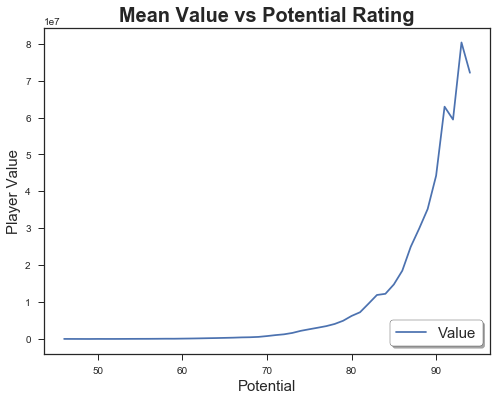

In [17]:
#Potential and Value
# Selecting unique Age from DataFrame
potential = dataset.sort_values("Potential")['Potential'].unique()
# Selecting mean Overall from DataFrame
overall = dataset.sort_values("Overall")['Overall'].unique()
# Selecting mean value from DataFrame
value = dataset.groupby("Potential")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Potential', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(potential, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

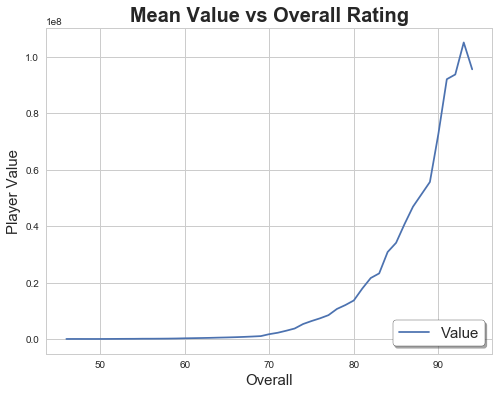

In [18]:
#Overall and Value
# Selecting unique Age from DataFrame
overall = dataset.sort_values("Overall")['Overall'].unique()
# Selecting mean Overall from DataFrame
value = dataset.groupby("Overall")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Overall Rating', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

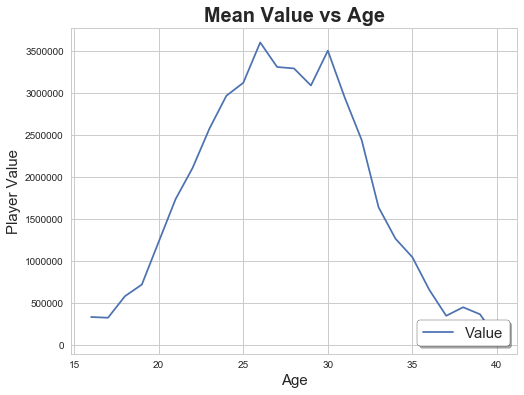

In [19]:
#Age and value
# Selecting unique Age from DataFrame
age = dataset.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
value = dataset.groupby("Age")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Age', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

Interestingly, players with more offensive playstyles are more expensive than defensive ones. Even though both positions are equally important, a bias on the transfer market values one more than the other (maybe because they have better marketting value for advertisements, jersey sales which unfortunately is not contained in the dataset).<br/>
Versatility is also a valueable asset because it enables a coach to have more freedom for team management.<br/>
Obviously the better a player's overall rating the greater his transfer value. But less obviously, players with high potential values are very expenssive too because teams see them as an investment.

### Player Overall and Potential Rating

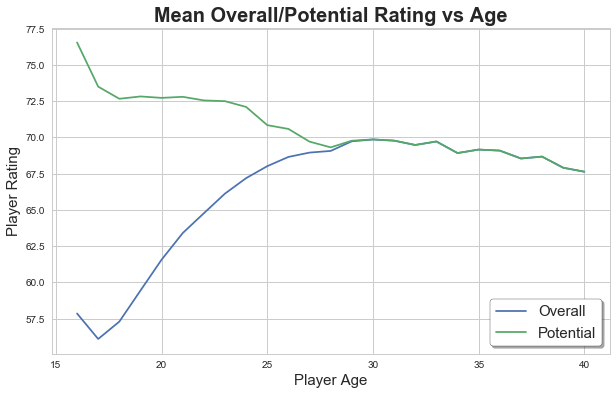

In [20]:
#Age and quality
#Age and potential
# Selecting players with age smaller then 40 
dataset = processed_df.loc[processed_df['Age'] <= 40]
# Selecting unique Age from DataFrame
age = dataset.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
overall = dataset.groupby("Age")["Overall"].mean().values
# Selecting mean Potential from DataFrame
potential = dataset.groupby("Age")["Potential"].mean().values

plt.figure(figsize=(10,6))
plt.title('Mean Overall/Potential Rating vs Age', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Rating', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [21]:
#Maximum player overall score per country
country_overall = dataset.groupby("Nationality")["Overall"].max()
country_overall = country_overall.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_overall['Nationality'],
        z = country_overall['Overall'],
        colorscale = [[55,"rgb(5, 10, 172)"],[59,"rgb(40, 60, 190)"],[63,"rgb(70, 100, 245)"],\
            [67,"rgb(90, 120, 245)"],[71,"rgb(106, 137, 247)"],[75,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Maximum<br>Overall Score'),
      ) ]

layout = dict(
    title = 'Player Quality',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False )

In [22]:
#Maximum player potential score per country
country_potential = dataset.groupby("Nationality")["Potential"].max()
country_potential = country_potential.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_potential['Nationality'],
        z = country_potential['Potential'],
        colorscale = [[65,"rgb(5, 10, 172)"],[67,"rgb(40, 60, 190)"],[69,"rgb(70, 100, 245)"],\
            [71,"rgb(90, 120, 245)"],[73,"rgb(106, 137, 247)"],[75,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Maximum<br>Potential Score'),
      ) ]

layout = dict(
    title = 'Player Potential',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False )

The main football hubs seem to be South America and Western Europe.

### Clubs

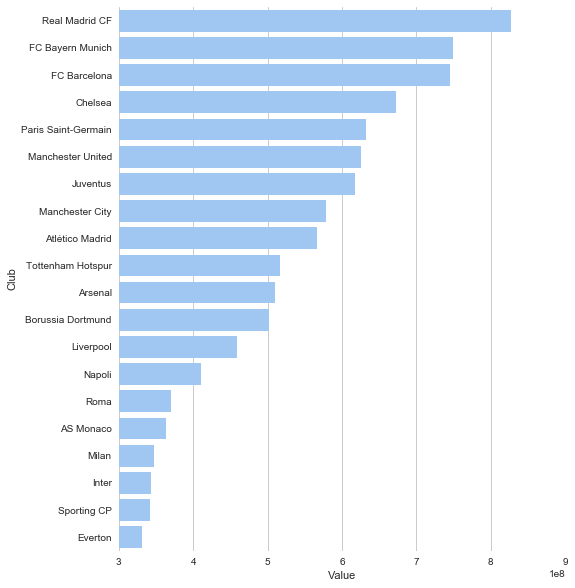

In [23]:
#Team value
club_value = dataset.groupby("Club")["Value"].sum()
club_value = club_value.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=club_value.nlargest(20, "Value")["Club"], x=club_value.nlargest(20, "Value")["Value"], data=club_value,
            label="Total", color="b")
ax.set(xlim=(3e8, 9e8))

sns.despine(left=True, bottom=True)

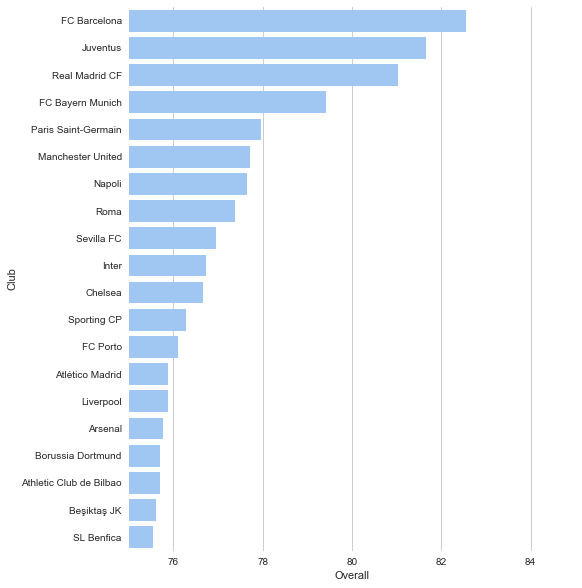

In [24]:
#Team quality
club_overall = dataset.groupby("Club")["Overall"].mean()
club_overall = club_overall.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=club_overall.nlargest(20, "Overall")["Club"], x=club_overall.nlargest(20, "Overall")["Overall"], data=club_overall,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

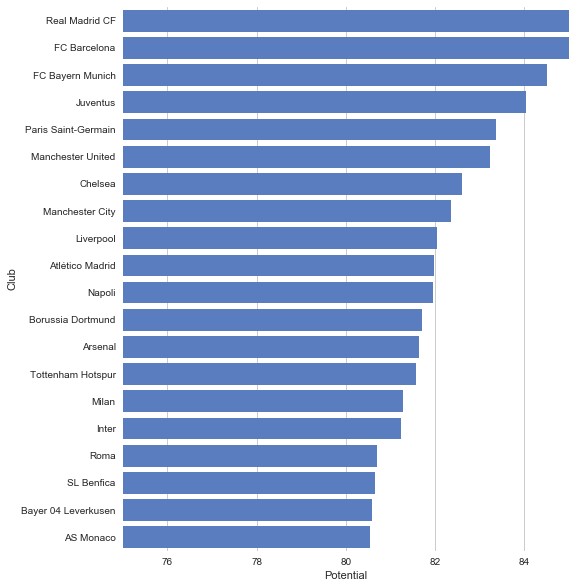

In [25]:
#Team potential
club_potential = dataset.groupby("Club")["Potential"].mean()
club_potential = club_potential.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y=club_potential.nlargest(20, "Potential")["Club"], x=club_potential.nlargest(20, "Potential")["Potential"], data=club_potential,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

### Heatmaps
Let us look at the correlation between certain features.

<Figure size 936x936 with 0 Axes>

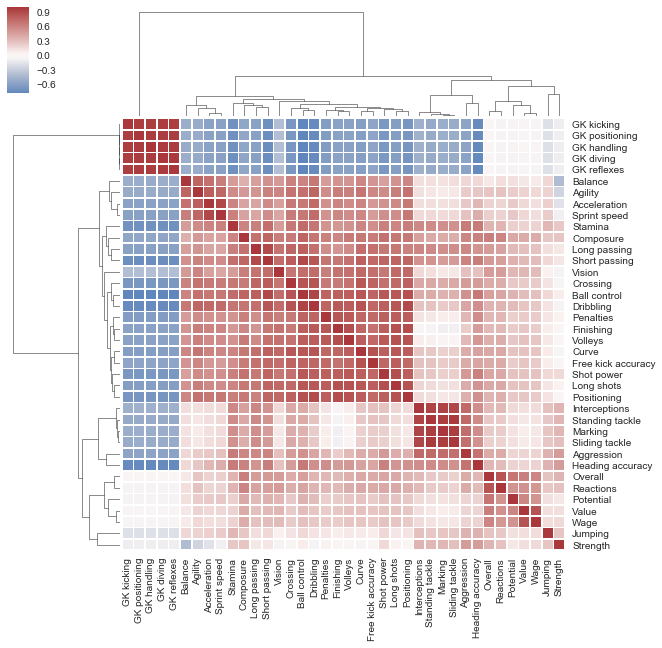

In [26]:
#Heatmap: show the correlation between similar features.
# Select a subset of the df
used_variables = ['Overall', 'Potential',
       'Value', 'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']
used_columns = (processed_df.columns.get_level_values(None).isin(used_variables))
df = processed_df.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(13,13))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)


<Figure size 936x936 with 0 Axes>

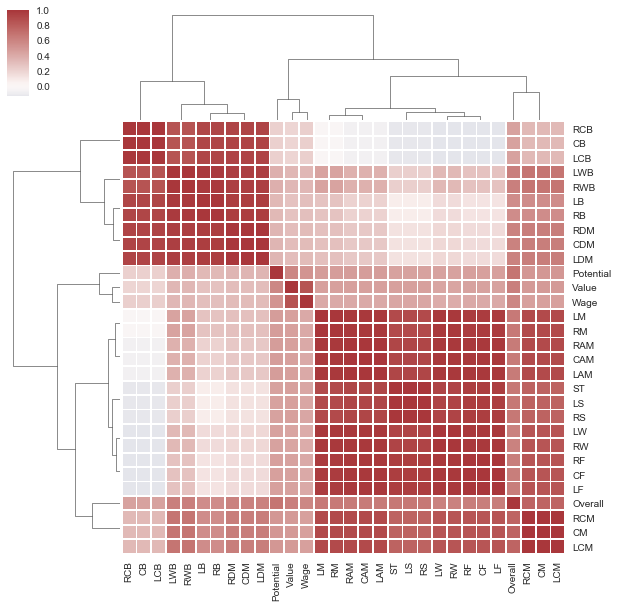

In [27]:
#Heatmap
# Select a subset of the df
used_variables = ['Overall', 'Potential', 'Value', 'Wage', 'CAM',
                  'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM',
                  'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB','RAM', 'RB',
                  'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST']
used_columns = (processed_df.columns.get_level_values(None).isin(used_variables))
df = processed_df.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(13,13))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)

# Modeling
Now let us make a machine learning model to predict player transfer value and wage based on his characteristics
## Transfer Value 
Following our EDA, we saw that the nationality and club had little consequence over the player's value, and adding them to the model would add a lot of dimensions, so we can safely drop them.

In [28]:
preprocessed_df = processed_df.copy()
preprocessed_df = preprocessed_df.drop(['Name', 'Nationality', 'Club'], 1)
preprocessed_df = preprocessed_df.drop(preprocessed_df.columns[0], 1)
#Separate x and y
y_value = preprocessed_df['Value'].copy()
y_wage = preprocessed_df['Wage'].copy()
preprocessed_df = preprocessed_df.drop(['Value', 'Wage'], 1)

As we have seen in the EDA, a player's versatility is valuable so we need to capture that in the model.

In [29]:
# Add versatility to the model
def count_positions(position):
    return len(re.sub("[^\w]", " ",  position).split()) #Split the preferred positions

preprocessed_df['Versatility'] = preprocessed_df['Preferred Positions'].apply(count_positions)
preprocessed_df.head()

,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Versatility
0,32,94,94,89.0,63.0,89.0,63.0,93.0,95.0,85.0,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,2
1,30,93,93,92.0,48.0,90.0,95.0,95.0,96.0,77.0,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,1
2,25,92,94,94.0,56.0,96.0,82.0,95.0,92.0,75.0,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,1
3,30,92,92,88.0,78.0,86.0,60.0,91.0,83.0,77.0,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,1
4,31,92,92,58.0,29.0,52.0,35.0,48.0,70.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [30]:
#Remove the initial one hot encoded column and remove space in columns to enable graphviz tree plotting
preprocessed_df = preprocessed_df.drop(['Preferred Positions'], 1)
preprocessed_df.columns = preprocessed_df.columns.str.replace('\s+', '_')

In [31]:
#Train-Test split
X_train_value, X_test_value, y_train_value, y_test_value = train_test_split(preprocessed_df, y_value, test_size=0.2)
X_train_wage, X_test_wage, y_train_wage, y_test_wage = train_test_split(preprocessed_df, y_wage, test_size=0.2)

In [32]:
#Create permutations of different hyperparameter combinations
num_boost_round = 999
early_stopping_rounds = 10

xgb_params = {
                'n_estimators':[500],
                # Other parameters
                'objective':['reg:linear'],
                'eval_metric':[ ["rmse" ,"mae"]],
                'min_child_weight': [1],
                'eta': [0.01, 0.1], #Learning rate
                'gamma': [0.05, 0.1], #Minimum acceptable entropy improvement to perform a split
                #Bias\variance tradeoff knobs
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'max_depth': [6, 9]
              }

params_perms = [dict(zip(xgb_params, v)) for v in product(*xgb_params.values())]
print(len(params_perms))
print(params_perms[0])

32
{'n_estimators': 500, 'objective': 'reg:linear', 'eval_metric': ['rmse', 'mae'], 'min_child_weight': 1, 'eta': 0.01, 'gamma': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'max_depth': 6}


In [33]:
dtrain_value = xgb.DMatrix(X_train_value, label=y_train_value)
dtest_value = xgb.DMatrix(X_test_value, label=y_test_value)
evaluation_set_value = [(dtest_value, "Test_set")]

### Create Baseline Model for Comparison (Average)

In [34]:
mean_train_value = np.mean(y_train_value)

# Get predictions on the test set
baseline_predictions_value = np.ones(y_test_value.shape) * mean_train_value

# Compute MAE
mae_baseline_value = mean_absolute_error(y_test_value, baseline_predictions_value)

# Compute RMSE
rmse_baseline_value = sqrt(mean_squared_error(y_test_value, baseline_predictions_value))

print("Baseline MAE is {:.2f}".format(mae_baseline_value))
print("Baseline RMSE is {:.2f}".format(rmse_baseline_value))

Baseline MAE is 2667872.59
Baseline RMSE is 5546104.58


### Grid Search for Best Parameters

In [35]:
best_score_value = mae_baseline_value
best_params_value = {}
for i, grid_search_value in enumerate(params_perms):
    print("Permutation number:", i+1)
    cv_results_value = xgb.cv(grid_search_value,
                        dtrain_value,
                        num_boost_round=num_boost_round,
                        seed=42,
                        nfold=2,
                        metrics=['mae', 'rmse'],
                        early_stopping_rounds=early_stopping_rounds
                        )
    
    mean_mae_value = cv_results_value['test-mae-mean'].min()
    boost_rounds_value = cv_results_value['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae_value, boost_rounds_value))
    if mean_mae_value < best_score_value:
        best_score_value = mean_mae_value
        best_params_value = grid_search_value

Permutation number: 1


/Users/paulfournier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning:

'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.



	MAE 174504.546875 for 998 rounds
Permutation number: 2
	MAE 170021.6328125 for 998 rounds
Permutation number: 3
	MAE 168309.1015625 for 994 rounds
Permutation number: 4
	MAE 162653.5078125 for 998 rounds
Permutation number: 5
	MAE 181790.84375 for 988 rounds
Permutation number: 6
	MAE 179391.8125 for 997 rounds
Permutation number: 7
	MAE 180445.7578125 for 986 rounds
Permutation number: 8
	MAE 176495.8828125 for 998 rounds
Permutation number: 9
	MAE 174504.546875 for 998 rounds
Permutation number: 10
	MAE 170021.6328125 for 998 rounds
Permutation number: 11
	MAE 168309.1015625 for 994 rounds
Permutation number: 12
	MAE 162653.5078125 for 998 rounds
Permutation number: 13
	MAE 181790.84375 for 988 rounds
Permutation number: 14
	MAE 179391.8125 for 997 rounds
Permutation number: 15
	MAE 180445.7578125 for 986 rounds
Permutation number: 16
	MAE 176495.8828125 for 998 rounds
Permutation number: 17
	MAE 190592.0078125 for 148 rounds
Permutation number: 18
	MAE 191342.3828125 for 136 rounds

In [36]:
print("Best Score:", best_score_value)
print("Best Parameters:", best_params_value)

Best Score: 162653.5078125
Best Parameters: {'n_estimators': 500, 'objective': 'reg:linear', 'eval_metric': ['rmse', 'mae'], 'min_child_weight': 1, 'eta': 0.01, 'gamma': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0, 'max_depth': 9}


### Retrain the Model with the Best Parameters

In [37]:
#Retrain a model with new best params
model_value = xgb.train(
    best_params_value,
    dtrain_value,
    num_boost_round=num_boost_round,
    evals=evaluation_set_value,
    early_stopping_rounds=early_stopping_rounds
)

[0]	Test_set-rmse:5.98113e+06	Test_set-mae:2.35589e+06
Multiple eval metrics have been passed: 'Test_set-mae' will be used for early stopping.

Will train until Test_set-mae hasn't improved in 10 rounds.
[1]	Test_set-rmse:5.92531e+06	Test_set-mae:2.33314e+06
[2]	Test_set-rmse:5.87042e+06	Test_set-mae:2.31068e+06
[3]	Test_set-rmse:5.81869e+06	Test_set-mae:2.28876e+06
[4]	Test_set-rmse:5.76722e+06	Test_set-mae:2.26682e+06
[5]	Test_set-rmse:5.71312e+06	Test_set-mae:2.24499e+06
[6]	Test_set-rmse:5.66261e+06	Test_set-mae:2.22347e+06
[7]	Test_set-rmse:5.61277e+06	Test_set-mae:2.20224e+06
[8]	Test_set-rmse:5.56376e+06	Test_set-mae:2.18124e+06
[9]	Test_set-rmse:5.5139e+06	Test_set-mae:2.16022e+06
[10]	Test_set-rmse:5.46362e+06	Test_set-mae:2.13941e+06
[11]	Test_set-rmse:5.41372e+06	Test_set-mae:2.11897e+06
[12]	Test_set-rmse:5.36494e+06	Test_set-mae:2.09871e+06
[13]	Test_set-rmse:5.31536e+06	Test_set-mae:2.07862e+06
[14]	Test_set-rmse:5.26748e+06	Test_set-mae:2.05866e+06
[15]	Test_set-rmse:5.2

[149]	Test_set-rmse:1.80284e+06	Test_set-mae:601959
[150]	Test_set-rmse:1.79056e+06	Test_set-mae:596780
[151]	Test_set-rmse:1.78027e+06	Test_set-mae:591770
[152]	Test_set-rmse:1.76821e+06	Test_set-mae:586661
[153]	Test_set-rmse:1.75561e+06	Test_set-mae:581652
[154]	Test_set-rmse:1.74434e+06	Test_set-mae:576748
[155]	Test_set-rmse:1.73258e+06	Test_set-mae:571804
[156]	Test_set-rmse:1.72129e+06	Test_set-mae:567023
[157]	Test_set-rmse:1.71016e+06	Test_set-mae:562266
[158]	Test_set-rmse:1.69897e+06	Test_set-mae:557546
[159]	Test_set-rmse:1.68811e+06	Test_set-mae:552801
[160]	Test_set-rmse:1.67787e+06	Test_set-mae:548196
[161]	Test_set-rmse:1.66803e+06	Test_set-mae:543656
[162]	Test_set-rmse:1.65741e+06	Test_set-mae:539090
[163]	Test_set-rmse:1.64722e+06	Test_set-mae:534574
[164]	Test_set-rmse:1.638e+06	Test_set-mae:530228
[165]	Test_set-rmse:1.62773e+06	Test_set-mae:525776
[166]	Test_set-rmse:1.61772e+06	Test_set-mae:521343
[167]	Test_set-rmse:1.60886e+06	Test_set-mae:517110
[168]	Test_set

[311]	Test_set-rmse:914405	Test_set-mae:208919
[312]	Test_set-rmse:912322	Test_set-mae:208075
[313]	Test_set-rmse:910462	Test_set-mae:207280
[314]	Test_set-rmse:908982	Test_set-mae:206484
[315]	Test_set-rmse:907467	Test_set-mae:205669
[316]	Test_set-rmse:906231	Test_set-mae:204931
[317]	Test_set-rmse:904426	Test_set-mae:204195
[318]	Test_set-rmse:902901	Test_set-mae:203422
[319]	Test_set-rmse:901806	Test_set-mae:202710
[320]	Test_set-rmse:900436	Test_set-mae:202027
[321]	Test_set-rmse:898913	Test_set-mae:201297
[322]	Test_set-rmse:897652	Test_set-mae:200611
[323]	Test_set-rmse:896210	Test_set-mae:199929
[324]	Test_set-rmse:894280	Test_set-mae:199197
[325]	Test_set-rmse:892978	Test_set-mae:198484
[326]	Test_set-rmse:891596	Test_set-mae:197795
[327]	Test_set-rmse:890639	Test_set-mae:197188
[328]	Test_set-rmse:888809	Test_set-mae:196504
[329]	Test_set-rmse:887238	Test_set-mae:195829
[330]	Test_set-rmse:885715	Test_set-mae:195123
[331]	Test_set-rmse:884560	Test_set-mae:194493
[332]	Test_se

[486]	Test_set-rmse:790658	Test_set-mae:154864
[487]	Test_set-rmse:790500	Test_set-mae:154796
[488]	Test_set-rmse:790252	Test_set-mae:154726
[489]	Test_set-rmse:790008	Test_set-mae:154652
[490]	Test_set-rmse:789798	Test_set-mae:154587
[491]	Test_set-rmse:789579	Test_set-mae:154528
[492]	Test_set-rmse:789140	Test_set-mae:154437
[493]	Test_set-rmse:788956	Test_set-mae:154371
[494]	Test_set-rmse:788747	Test_set-mae:154291
[495]	Test_set-rmse:788293	Test_set-mae:154175
[496]	Test_set-rmse:788133	Test_set-mae:154122
[497]	Test_set-rmse:788001	Test_set-mae:154058
[498]	Test_set-rmse:787826	Test_set-mae:154008
[499]	Test_set-rmse:787695	Test_set-mae:153962
[500]	Test_set-rmse:787583	Test_set-mae:153917
[501]	Test_set-rmse:787489	Test_set-mae:153866
[502]	Test_set-rmse:787357	Test_set-mae:153814
[503]	Test_set-rmse:787255	Test_set-mae:153766
[504]	Test_set-rmse:787199	Test_set-mae:153721
[505]	Test_set-rmse:787028	Test_set-mae:153667
[506]	Test_set-rmse:786803	Test_set-mae:153603
[507]	Test_se

[661]	Test_set-rmse:771539	Test_set-mae:149486
[662]	Test_set-rmse:771514	Test_set-mae:149484
[663]	Test_set-rmse:771465	Test_set-mae:149468
[664]	Test_set-rmse:771453	Test_set-mae:149462
[665]	Test_set-rmse:771415	Test_set-mae:149452
[666]	Test_set-rmse:771382	Test_set-mae:149451
[667]	Test_set-rmse:771234	Test_set-mae:149424
[668]	Test_set-rmse:771193	Test_set-mae:149415
[669]	Test_set-rmse:771226	Test_set-mae:149410
[670]	Test_set-rmse:771092	Test_set-mae:149384
[671]	Test_set-rmse:771099	Test_set-mae:149389
[672]	Test_set-rmse:771106	Test_set-mae:149393
[673]	Test_set-rmse:771113	Test_set-mae:149390
[674]	Test_set-rmse:771070	Test_set-mae:149380
[675]	Test_set-rmse:771056	Test_set-mae:149382
[676]	Test_set-rmse:771034	Test_set-mae:149372
[677]	Test_set-rmse:771052	Test_set-mae:149383
[678]	Test_set-rmse:771046	Test_set-mae:149379
[679]	Test_set-rmse:771063	Test_set-mae:149383
[680]	Test_set-rmse:771053	Test_set-mae:149378
[681]	Test_set-rmse:771072	Test_set-mae:149378
[682]	Test_se

### Evaluate the Model

In [38]:
print("Average guess error", mae_baseline_value)
print("vs Mean Absolute Error", mean_absolute_error(model_value.predict(dtest_value), y_test_value))

Average guess error 2667872.5941281556
vs Mean Absolute Error 148955.3561230496


Our model is very precise at predicting transfer values: it finds transfer values with an error margin that is 10% of the error a human would have. 

### Model Summary

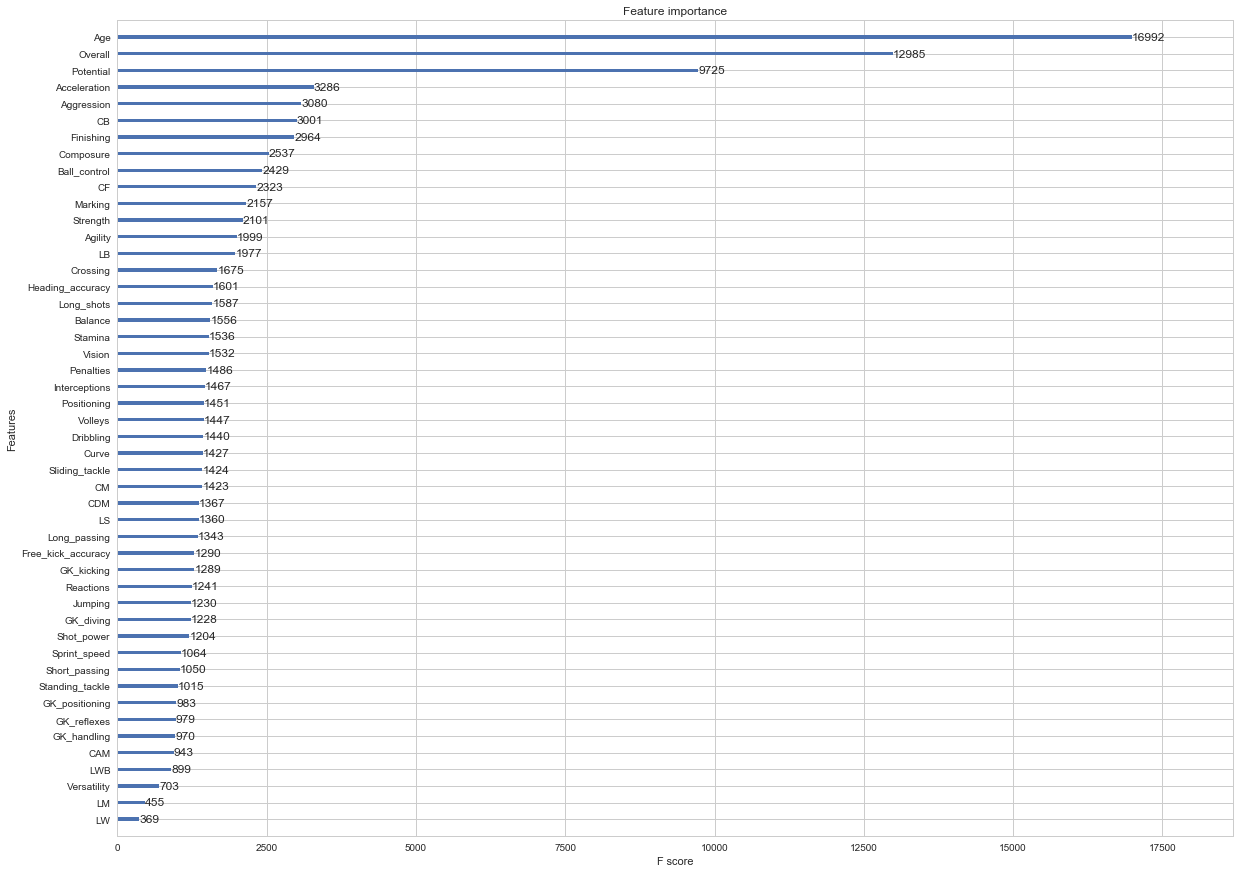

In [39]:
#Feature Importance
plt.figure(figsize=(20,15))
xgb.plot_importance(model_value, ax=plt.gca())

In [40]:
#Tree Diagram
plt.figure()
plt.savefig('tree_value.png')

<Figure size 432x288 with 0 Axes>

### Predictions
Now we can look at who are the players our model considers to be overpriced and underpriced.

In [41]:
#Predict the value based on the model.
dpred_value = xgb.DMatrix(preprocessed_df, label = y_value)
y_pred = pd.Series(model_value.predict(dpred_value))

In [42]:
#Top 10% players with overpriced transfer values.
sub_value = y_value.subtract(y_pred)
exp_value = processed_df.loc[sub_value.nlargest(int(len(sub_value)/1000)).index]
exp_value

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
183,183,M. Dembélé,29,Belgium,83,83,Tottenham Hotspur,25000000.0,115000.0,75.0,...,76.0,78.0,81.0,80.0,79.0,79.0,77.0,78.0,77.0,77.0
11,11,K. De Bruyne,26,Belgium,89,92,Manchester City,83000000.0,285000.0,76.0,...,66.0,57.0,84.0,70.0,85.0,85.0,81.0,85.0,71.0,81.0
7,7,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,93.0,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
70,70,R. Varane,24,France,85,92,Real Madrid CF,46500000.0,175000.0,77.0,...,77.0,83.0,69.0,79.0,62.0,63.0,62.0,61.0,73.0,62.0
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
84,84,M. Pjanić,27,Bosnia Herzegovina,85,86,Juventus,43500000.0,160000.0,74.0,...,75.0,70.0,83.0,78.0,80.0,81.0,74.0,80.0,77.0,74.0
25,25,J. Boateng,28,Germany,88,88,FC Bayern Munich,48000000.0,215000.0,72.0,...,81.0,85.0,73.0,82.0,66.0,69.0,65.0,65.0,79.0,65.0
69,69,Y. Carrasco,23,Belgium,85,90,Atlético Madrid,51500000.0,77000.0,87.0,...,56.0,45.0,74.0,56.0,83.0,83.0,79.0,84.0,60.0,79.0
12,12,T. Courtois,25,Belgium,89,92,Chelsea,59000000.0,190000.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,111,Bruno,33,Spain,84,84,Villarreal CF,18500000.0,59000.0,42.0,...,74.0,78.0,82.0,82.0,74.0,72.0,71.0,71.0,75.0,71.0


In [43]:
#Top 10% players with underpriced transfer values.
cheap_value = sub_value.nsmallest(int(len(sub_value)/1000))
cheap_value = processed_df.loc[cheap_value.index]
cheap_value

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
18,18,G. Buffon,39,Italy,89,89,Juventus,4500000.0,110000.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,Sergio Ramos,31,Spain,90,90,Real Madrid CF,52000000.0,310000.0,75.0,...,84.0,87.0,74.0,83.0,70.0,71.0,72.0,69.0,81.0,72.0
68,68,P. Čech,35,Czech Republic,86,86,Arsenal,10500000.0,92000.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3067,3067,M. Krmenčík,24,Czech Republic,73,78,NaN,0.0,0.0,73.0,...,47.0,46.0,59.0,48.0,70.0,67.0,72.0,69.0,49.0,72.0
2626,2626,J. Zmrhal,23,Czech Republic,73,78,NaN,0.0,0.0,80.0,...,63.0,57.0,69.0,62.0,71.0,72.0,70.0,71.0,65.0,70.0
197,197,Casillas,36,Spain,83,83,FC Porto,3500000.0,10000.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2553,2553,J. Fuenzalida,32,Chile,74,74,NaN,0.0,0.0,82.0,...,72.0,68.0,72.0,70.0,73.0,75.0,70.0,74.0,73.0,70.0
33,33,N. Kanté,26,France,87,90,Chelsea,52500000.0,190000.0,82.0,...,82.0,81.0,81.0,84.0,76.0,78.0,72.0,76.0,83.0,72.0
2912,2912,J. Góralski,24,Poland,73,77,NaN,0.0,0.0,70.0,...,70.0,70.0,68.0,72.0,61.0,65.0,58.0,62.0,70.0,58.0


In [44]:
model_value.save_model("model_value.model")

## Wage

In [45]:
dtrain_wage = xgb.DMatrix(X_train_wage, label=y_train_wage)
dtest_wage = xgb.DMatrix(X_test_wage, label=y_test_wage)
evaluation_set_wage = [(dtest_wage, "Test_set")]

### Create Baseline Model for Comparison (Average)

In [46]:
mean_train_wage = np.mean(y_train_wage)

# Get predictions on the test set
baseline_predictions_wage = np.ones(y_test_wage.shape) * mean_train_wage

# Compute MAE
mae_baseline_wage = mean_absolute_error(y_test_wage, baseline_predictions_wage)

# Compute RMSE
rmse_baseline_wage = sqrt(mean_squared_error(y_test_wage, baseline_predictions_wage))

print("Baseline MAE is {:.2f}".format(mae_baseline_wage))
print("Baseline RMSE is {:.2f}".format(rmse_baseline_wage))

Baseline MAE is 11871.84
Baseline RMSE is 21765.56


### Grid Search for Best Parameters

In [47]:
best_score_wage = mae_baseline_wage
best_params_wage = {}
for i, grid_search_wage in enumerate(params_perms):
    print("Permutation number:", i+1)
    cv_results_wage = xgb.cv(grid_search_wage,
                        dtrain_wage,
                        num_boost_round=num_boost_round,
                        seed=42,
                        nfold=2,
                        metrics=['mae', 'rmse'],
                        early_stopping_rounds=early_stopping_rounds
                        )
    
    mean_mae_wage = cv_results_wage['test-mae-mean'].min()
    boost_rounds_wage = cv_results_wage['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae_wage, boost_rounds_wage))
    if mean_mae_wage < best_score_wage:
        best_score_wage = mean_mae_wage
        best_params_wage = grid_search_wage

Permutation number: 1


/Users/paulfournier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning:

'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.



	MAE 5440.9719239999995 for 225 rounds
Permutation number: 2
	MAE 5427.44751 for 234 rounds
Permutation number: 3
	MAE 5439.9589845 for 223 rounds
Permutation number: 4
	MAE 5427.2687989999995 for 220 rounds
Permutation number: 5
	MAE 5474.142334 for 230 rounds
Permutation number: 6
	MAE 5472.523681500001 for 224 rounds
Permutation number: 7
	MAE 5456.0693360000005 for 217 rounds
Permutation number: 8
	MAE 5532.402832 for 228 rounds
Permutation number: 9
	MAE 5440.9719239999995 for 225 rounds
Permutation number: 10
	MAE 5427.44751 for 234 rounds
Permutation number: 11
	MAE 5439.9589845 for 223 rounds
Permutation number: 12
	MAE 5427.2687989999995 for 220 rounds
Permutation number: 13
	MAE 5474.142334 for 230 rounds
Permutation number: 14
	MAE 5472.523681500001 for 224 rounds
Permutation number: 15
	MAE 5456.0693360000005 for 217 rounds
Permutation number: 16
	MAE 5532.402832 for 228 rounds
Permutation number: 17
	MAE 5479.5983885000005 for 21 rounds
Permutation number: 18
	MAE 5514.756

### Retrain the Model with the Best Parameters

In [48]:
#Retrain a model with new best params
model_wage = xgb.train(
    best_params_wage,
    dtrain_wage,
    num_boost_round=num_boost_round,
    evals=evaluation_set_wage,
    early_stopping_rounds=early_stopping_rounds
)

[0]	Test_set-rmse:24422.4	Test_set-mae:11357.4
Multiple eval metrics have been passed: 'Test_set-mae' will be used for early stopping.

Will train until Test_set-mae hasn't improved in 10 rounds.
[1]	Test_set-rmse:24246.4	Test_set-mae:11253.2
[2]	Test_set-rmse:24069.8	Test_set-mae:11151.4
[3]	Test_set-rmse:23888.8	Test_set-mae:11048.3
[4]	Test_set-rmse:23706.7	Test_set-mae:10947.7
[5]	Test_set-rmse:23526.4	Test_set-mae:10848
[6]	Test_set-rmse:23357.9	Test_set-mae:10750.6
[7]	Test_set-rmse:23201.9	Test_set-mae:10655.5
[8]	Test_set-rmse:23036.9	Test_set-mae:10560.7
[9]	Test_set-rmse:22871.7	Test_set-mae:10467.2
[10]	Test_set-rmse:22705.1	Test_set-mae:10372.5
[11]	Test_set-rmse:22556.1	Test_set-mae:10282.8
[12]	Test_set-rmse:22403.9	Test_set-mae:10192.7
[13]	Test_set-rmse:22240.6	Test_set-mae:10101.3
[14]	Test_set-rmse:22090	Test_set-mae:10013.1
[15]	Test_set-rmse:21935.4	Test_set-mae:9925.54
[16]	Test_set-rmse:21776.8	Test_set-mae:9837.8
[17]	Test_set-rmse:21636.7	Test_set-mae:9752.91
[1

[168]	Test_set-rmse:12105.1	Test_set-mae:5434.57
[169]	Test_set-rmse:12092.4	Test_set-mae:5431.96
[170]	Test_set-rmse:12075.1	Test_set-mae:5428.73
[171]	Test_set-rmse:12060.3	Test_set-mae:5426.1
[172]	Test_set-rmse:12045.4	Test_set-mae:5423.38
[173]	Test_set-rmse:12027.6	Test_set-mae:5420.04
[174]	Test_set-rmse:12015	Test_set-mae:5417.03
[175]	Test_set-rmse:12001.1	Test_set-mae:5414.86
[176]	Test_set-rmse:11981.9	Test_set-mae:5411.14
[177]	Test_set-rmse:11971.2	Test_set-mae:5409.07
[178]	Test_set-rmse:11954.5	Test_set-mae:5406.88
[179]	Test_set-rmse:11939.5	Test_set-mae:5404.89
[180]	Test_set-rmse:11925.5	Test_set-mae:5403.55
[181]	Test_set-rmse:11915.5	Test_set-mae:5401.29
[182]	Test_set-rmse:11902.9	Test_set-mae:5398.98
[183]	Test_set-rmse:11890	Test_set-mae:5396.54
[184]	Test_set-rmse:11877	Test_set-mae:5394.61
[185]	Test_set-rmse:11861.8	Test_set-mae:5392.21
[186]	Test_set-rmse:11848.3	Test_set-mae:5388.85
[187]	Test_set-rmse:11833.2	Test_set-mae:5386.29
[188]	Test_set-rmse:11821.1

### Evaluate the Model

In [49]:
print("Average guess error", mae_baseline_wage)
print("vs Mean Absolute Error", mean_absolute_error(model_wage.predict(dtest_wage), y_test_wage))

Average guess error 11871.840541632919
vs Mean Absolute Error 5347.052965959046


### Model Summary

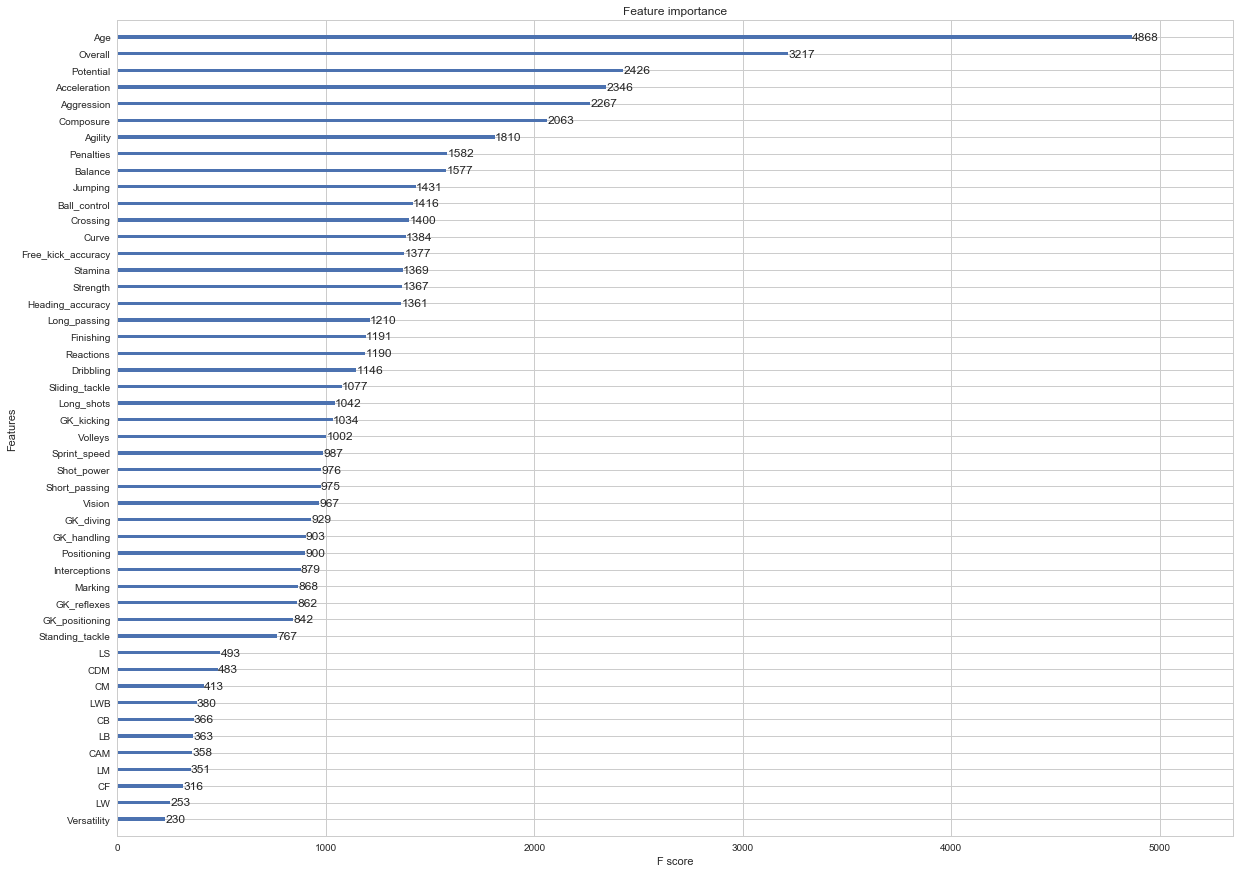

In [50]:
#Feature Importance
plt.figure(figsize=(20,15))
xgb.plot_importance(model_wage, ax=plt.gca())

### Predictions

In [52]:
#Predict the value based on the model.
dpred_wage = xgb.DMatrix(preprocessed_df, label = y_wage)
y_pred_wage = pd.Series(model_wage.predict(dpred_wage))

In [53]:
#Top 10% players with overpriced wages.
sub_wage = y_value.subtract(y_pred_wage)
exp_wage = processed_df.loc[sub_wage.nlargest(int(len(sub_wage)/1000)).index]
exp_wage

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,79.0,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
7,7,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,93.0,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
11,11,K. De Bruyne,26,Belgium,89,92,Manchester City,83000000.0,285000.0,76.0,...,66.0,57.0,84.0,70.0,85.0,85.0,81.0,85.0,71.0,81.0
19,19,P. Dybala,23,Argentina,88,93,Juventus,79000000.0,215000.0,88.0,...,55.0,43.0,78.0,55.0,86.0,86.0,83.0,87.0,60.0,83.0
8,8,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000.0,340000.0,60.0,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,Argentina,90,90,Juventus,77000000.0,275000.0,78.0,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [54]:
#Top 10% players with underpriced transfer values.
cheap_wage = sub_wage.nsmallest(int(len(sub_wage)/1000))
cheap_wage = processed_df.loc[cheap_wage.index]
cheap_wage

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
167,167,Adrien Silva,28,Portugal,83,83,NaN,0.0,0.0,64.0,...,78.0,75.0,82.0,81.0,78.0,79.0,74.0,78.0,79.0,74.0
925,925,B. Moukandjo,28,Cameroon,77,77,NaN,0.0,0.0,90.0,...,53.0,44.0,66.0,51.0,76.0,76.0,76.0,77.0,56.0,76.0
472,472,M. Berg,30,Sweden,80,80,NaN,0.0,0.0,74.0,...,50.0,47.0,66.0,51.0,76.0,71.0,78.0,73.0,53.0,78.0
1402,1402,P. Tau,23,South Africa,76,78,NaN,0.0,0.0,79.0,...,52.0,41.0,67.0,51.0,75.0,74.0,71.0,76.0,56.0,71.0
1802,1802,D. González,23,Paraguay,75,82,NaN,0.0,0.0,85.0,...,57.0,51.0,69.0,57.0,73.0,74.0,71.0,74.0,60.0,71.0
274,274,A. Witsel,28,Belgium,82,82,NaN,0.0,0.0,67.0,...,76.0,76.0,80.0,79.0,78.0,78.0,77.0,78.0,77.0,77.0
2246,2246,T. Sainsbury,25,Australia,74,77,NaN,0.0,0.0,73.0,...,72.0,73.0,66.0,71.0,62.0,64.0,61.0,62.0,70.0,61.0
162,162,Oscar,25,Brazil,83,86,NaN,0.0,0.0,75.0,...,61.0,49.0,77.0,61.0,80.0,79.0,74.0,79.0,64.0,74.0
3001,3001,S. Deli,25,Ivory Coast,73,77,NaN,0.0,0.0,74.0,...,70.0,72.0,63.0,68.0,60.0,62.0,60.0,60.0,69.0,60.0
2626,2626,J. Zmrhal,23,Czech Republic,73,78,NaN,0.0,0.0,80.0,...,63.0,57.0,69.0,62.0,71.0,72.0,70.0,71.0,65.0,70.0


The players with the most disproportionate wages are the best players in the world which goes to show that it is an important factor for clubs to consider when trying to attract players to their clubs. </b>
The "underpriced players" are good players that are not under contract. So team hop teams on these good deals.

In [55]:
model_wage.save_model("model_wage.model")